In [11]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
import time
%matplotlib inline

# Create a tridiagonal matrix
# A = tridiag(a_i,b_i,c_i)
def tridiag(a,b,c):
    n=len(b)
    A=np.zeros((n,n))
    if len(a)!=n-1 or len(c)!=n-1:
        print("Dimension error: len(a)+1==len(b) and len(c)+1==len(b) is required")
        return
    A[0,0]=b[0]
    A[0,1]=c[0]
    for i in range(1,n-1):
        A[i,i-1]=a[i-1]
        A[i,i]=b[i]
        A[i,i+1]=c[i]
    A[-1,-1]=b[-1]
    A[-1,-2]=a[-1]
    return A

# Create a random tridiagonal linear equation system
def make_problem(n):
    a=np.random.rand(n-1)
    b=np.random.rand(n)
    c=np.random.rand(n-1)
    y=np.random.rand(n)
    return a,b,c,y

# Create a lower bidiagonal matrix 
# A = tridiag(a_i,b_i,0)
def lbidiag(a,b):
    c=np.zeros(len(a))
    A=tridiag(a,b,c)
    return A

# Create n upper bidiagonal matrix 
# A = tridiag(0,b_i,c_i)
def ubidiag(b,c):
    a=np.zeros(len(c))
    A=tridiag(a,b,c)
    return A
    
# Solve a lower bidiagonal linear equation system
# tridiag(a_i,b_i,0) * x = y
# Time complexity: O(n)
def lsolve(a,b,y):
    n=len(b)
    x=np.zeros(n)
    x[0]=y[0]/b[0]
    for i in range(1,n):
        x[i]=(y[i]-a[i-1]*x[i-1])/b[i]
    return x

# Solve an upper bidiagonal linear equation system
# tridiag(0,b_i,c_i) * x = y
# Time complexity: O(n)
def usolve(b,c,y):
    n=len(b)
    x=np.zeros(n)
    x[n-1]=y[n-1]/b[n-1]
    for i in range(n-2,-1,-1):
        x[i]=(y[i]-c[i]*x[i+1])/b[i]
    return x

# Test for solving lower bidiagonal LES
def test1(n=5):
    a,b,c,y=make_problem(n)
    A=lbidiag(a,b)
    print("A =\n",A)
    print("y =",y,"\n")
    x=la.solve(A,y)
    print("Solve LES with numpy \nx =",x)
    xx=lsolve(a,b,y)
    print("Solve LES with upper bidiagonal algorithm \nxx=",xx)

# Test for solving upper bidiagonal LES
def test2(n=5):
    a,b,c,y=make_problem(n)
    A=ubidiag(b,c)
    print("A =\n",A)
    print("y =",y,"\n")
    x=la.solve(A,y)
    print("Solve LES with numpy \nx =",x)
    xx=usolve(b,c,y)
    print("Solve LES with upper bidiagonal algorithm \nxx=",xx)

test1()
print("\n")
test2()

A =
 [[ 0.56785699  0.          0.          0.          0.        ]
 [ 0.15180655  0.15489332  0.          0.          0.        ]
 [ 0.          0.34646792  0.11081291  0.          0.        ]
 [ 0.          0.          0.11748706  0.85581859  0.        ]
 [ 0.          0.          0.          0.08640004  0.78770916]]
y = [ 0.41537775  0.03018752  0.35697853  0.53513888  0.03812907] 

Solve LES with numpy 
x = [ 0.73148303 -0.52201343  4.85358102 -0.04100644  0.05290281]
Solve LES with upper bidiagonal algorithm 
xx= [ 0.73148303 -0.52201343  4.85358102 -0.04100644  0.05290281]


A =
 [[ 0.30300709  0.12528672  0.          0.          0.        ]
 [ 0.          0.4272722   0.41850569  0.          0.        ]
 [ 0.          0.          0.92412587  0.30495284  0.        ]
 [ 0.          0.          0.          0.36598929  0.3486239 ]
 [ 0.          0.          0.          0.          0.87143661]]
y = [ 0.5998884   0.61594687  0.45909559  0.71896543  0.13467432] 

Solve LES with numpy 
x

In [12]:
# LU decomposition of a tridiagonal matrix
# L,U = tridiag(a_i,b_i,c_i)
# where
# L = tridiag(l_i,1,0)
# U = tridiag(0,u_i,c_i)
def tridiag_lu(a,b,c):
    n=len(b)
    u=np.zeros(n)
    l=np.zeros(n-1)
    u[0]=b[0]
    for k in range(0,n-1):
        l[k]=a[k]/u[k]
        u[k+1]=b[k+1]-l[k]*c[k]
    return l,u

# Test for LU decomposition
def test3(n=5):
    a,b,c,y=make_problem(n)
    A=tridiag(a,b,c)
    print("A =\n",A,"\n")
    l,u=tridiag_lu(a,b,c)
    print("l =",l)
    print("u =",u)
    L=lbidiag(l,np.ones(n))
    U=ubidiag(u,c)
    print("L =\n",L)
    print("U =\n",U,"\n")
    print("LU=\n",L @ U,"\n")
    print("Error in norm:",la.norm(L @ U - A))
test3()

A =
 [[ 0.54637659  0.88857804  0.          0.          0.        ]
 [ 0.79642346  0.06310612  0.12396526  0.          0.        ]
 [ 0.          0.22881443  0.06420872  0.08391814  0.        ]
 [ 0.          0.          0.47707829  0.0294045   0.85968837]
 [ 0.          0.          0.          0.01571695  0.23903127]] 

l = [ 1.45764566 -0.18570704  5.46920346 -0.03658841]
u = [ 0.54637659 -1.23212581  0.08722994 -0.42956087  0.2704859 ]
L =
 [[ 1.          0.          0.          0.          0.        ]
 [ 1.45764566  1.          0.          0.          0.        ]
 [ 0.         -0.18570704  1.          0.          0.        ]
 [ 0.          0.          5.46920346  1.          0.        ]
 [ 0.          0.          0.         -0.03658841  1.        ]]
U =
 [[ 0.54637659  0.88857804  0.          0.          0.        ]
 [ 0.         -1.23212581  0.12396526  0.          0.        ]
 [ 0.          0.          0.08722994  0.08391814  0.        ]
 [ 0.          0.          0.         -0.4

In [14]:
# Test for showing the equivalence of 
# x = A^{-1} * y   (O(n^3))
# and 
# U*x=z   (O(n))
# L*z=y   (O(n))
def test4(n=5):
    a,b,c,y=make_problem(n)
    A=tridiag(a,b,c)
    x=la.inv(A) @ y
    print("Inverse multiplication with numpy: \n",x)
    l,u=tridiag_lu(a,b,c)
    z=lsolve(l,np.ones(n),y)
    xx=usolve(u,c,z)
    print("Inverse multiplication via LU decomposition:\n",xx)

test4()

Inverse multiplication with numpy: 
 [ 0.16236003  0.79981806  0.89267485  0.77045901 -0.39282215]
Inverse multiplication via LU decomposition:
 [ 0.16236003  0.79981806  0.89267485  0.77045901 -0.39282215]


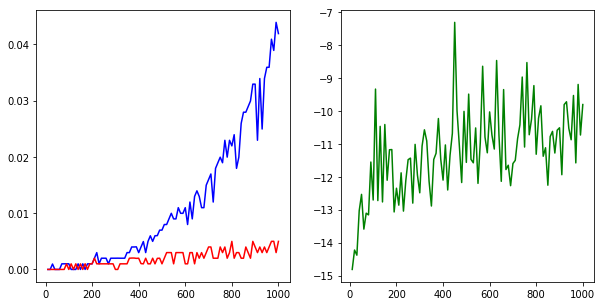

In [46]:
# Test to measure the time cost of the two different approaches
#   - Blue graph shows the time cost function of the standard A^{-1} * y algorithm
#   - Red graph shows the time cost function of the LU based bidiagonal algorithm
#   - The error between the solutions of the two algorithms was also measured,
#     the green graph shows the logarithmized value of norm of difference of the resulting vectors

def test5(nmin=100,nmax=1000):
    M=nmax//nmin
    N=np.linspace(nmin,nmax,M)
    t_np=np.zeros(M)
    t_lu=np.zeros(M)
    err=np.zeros(M)
    for i in range(0,M):
        n=int(N[i])
        a,b,c,y=make_problem(n)
        A=tridiag(a,b,c)
        
        tic = time.time()
        x=la.inv(A) @ y
        toc = time.time()
        t_np[i]=toc-tic
        
        tic = time.time()
        l,u=tridiag_lu(a,b,c)
        yy=lsolve(l,np.ones(n),y)
        xx=usolve(u,c,yy)
        toc = time.time()
        t_lu[i]=toc-tic
        
        err[i]=la.norm(x-xx)
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.plot(N,t_np,'b-')
    plt.plot(N,t_lu,'r-')
    plt.subplot(1,2,2)
    err=np.log(err)/np.log(10)
    plt.plot(N,err,'g-')
    #return t_np,t_lu,err
    
test5(10,1000)

In [47]:
# Defining a special type of tridiagonal matrix
def special_tridiag(diag,side,n):
    a=np.ones(n)*diag
    b=np.ones(n-1)*side
    A=tridiag(b,a,b)
    A[0,0]=1
    A[0,1]=0
    A[-1,-1]=1
    A[-1,-2]=0
    return A

